# Modelos de regresión

**Autor/es:**
+ Diego González Antonio Ruminot
+ Integrante 2

**Correos Electrónicos:**
+ diego.gonzalez2101@alumnos.ubiobio.cl
+ Correo integrante 2

**Fecha de Creación:** Septiembre de 2024  
**Versión:** 1.0

---

## Descripción

Este notebook contiene el desarrollo de la evaluación 2 - parte 1 de la asignatura de Inteligencia Artificial de la carrera de Ingeniería civil en informática de la Universidad del Bío Bío - Sede Concepción


In [1]:
# Descargar el archivo a la carpeta data
!wget https://raw.githubusercontent.com/JaznaLaProfe/InteligenciaArtificial/main/data/walmart.csv.zip

# Descomprimir el archivo directamente dentro de la carpeta data
!unzip -q walmart.csv.zip

# Eliminar el archivo zip
!rm walmart.csv.zip

# Eliminar la carpeta __MACOSX si se creó
!rm -rf __MACOSX

--2024-10-03 20:35:13--  https://raw.githubusercontent.com/JaznaLaProfe/InteligenciaArtificial/main/data/walmart.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4493735 (4.3M) [application/zip]
Saving to: ‘walmart.csv.zip’

walmart.csv.zip     100%[===================>]   4.29M  --.-KB/s    in 0.08s   

2024-10-03 20:35:13 (52.7 MB/s) - ‘walmart.csv.zip’ saved [4493735/4493735]



# Descripción de la data

El conjunto de datos proporciona información sobre:
+ Store: número de identificación de la tienda.
+ Date: semana en la que ocurrieron las ventas.
+ Weekly_Sales: monto total de ventas en esa tienda durante la semana.
+ Holiday_Flag: Un indicador binario que muestra si la semana coincide con un feriado importante.
+ Temperature: temperatura registrada en el día de la venta.
+ Fuel_Price: El precio del combustible en la región.
+ CPI: índice de precios al consumidor en la región.
+ Unemployment: tasa de desempleo prevalente en ese momento.
+ Event_Type: tipo de evento asociado a la semana, como Super Bowl, Labour Day, Thanksgiving, Christmas o semana normal.



# Contexto del negocio

Una cadena de tiendas minoristas desea mejorar la precisión en la planificación de inventarios y recursos mediante la redicción del monto de las ventas semanales en cada una de sus sucursales. Para lograr esto, se cuenta con un set de datos que incluye múltiples variables relevantes, como las ventas semanales históricas, las condiciones económicas y eventos especiales que podrían impactar el comportamiento de los consumidores.

# Objetivo

Desarrollar modelos de regresión que permitan predecir el monto de las ventas semanales para cada tienda, basándose en variables que reflejan tanto factores económicos como eventos estacionales y externos. Esta predicción permitirá a la cadena anticiparse a fluctuaciones en la demanda, optimizando así su cadena de suministro y maximizando la eficiencia operativa.

# Preparación del entorno

In [2]:
# Escriba su código acá
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pickle

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_log_error

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

# Carga de la data

In [3]:
data = pd.read_csv("walmart.csv", sep=",")
data

,Unnamed: 0,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Event_Type
0,0,1,2010-02-05,0,1.0,24924.50,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315,Normal
1,1,1,2010-02-05,0,26.0,11737.12,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315,Normal
2,2,1,2010-02-05,0,17.0,13223.76,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315,Normal
3,3,1,2010-02-05,0,45.0,37.44,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315,Normal
4,4,1,2010-02-05,0,28.0,1085.29,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,423281,45,2012-10-26,0,13.0,26240.14,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221,Normal
421566,423282,45,2012-10-26,0,16.0,2660.02,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221,Normal
421567,423283,45,2012-10-26,0,32.0,4131.54,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221,Normal
421568,423284,45,2012-10-26,0,83.0,717.82,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221,Normal


# Fase 1 - Comprensión del negocio

Una cadena de tiendas minoristas desea mejorar la precisión en la planificación de inventarios y recursos mediante la redicción del monto de las ventas semanales en cada una de sus sucursales. Para lograr esto, se cuenta con un set de datos que incluye múltiples variables relevantes, como las ventas semanales históricas, las condiciones económicas y eventos especiales que podrían impactar el comportamiento de los consumidores.

# Fase 2 - Comprensión de los datos

In [4]:
# Obtiene la cantidad de filas y columnas de dataframe
data.shape

(421570, 18)

In [5]:
# Obtiene el nombre de las columnas
data.columns

Index(['Unnamed: 0', 'Store', 'Date', 'IsHoliday', 'Dept', 'Weekly_Sales',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size',
       'Event_Type'],
      dtype='object')

In [6]:
# Obtiene info de las variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    421570 non-null  int64  
 1   Store         421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   IsHoliday     421570 non-null  int64  
 4   Dept          421570 non-null  float64
 5   Weekly_Sales  421570 non-null  float64
 6   Temperature   421570 non-null  float64
 7   Fuel_Price    421570 non-null  float64
 8   MarkDown1     421570 non-null  float64
 9   MarkDown2     421570 non-null  float64
 10  MarkDown3     421570 non-null  float64
 11  MarkDown4     421570 non-null  float64
 12  MarkDown5     421570 non-null  float64
 13  CPI           421570 non-null  float64
 14  Unemployment  421570 non-null  float64
 15  Type          421570 non-null  int64  
 16  Size          421570 non-null  int64  
 17  Event_Type    421570 non-null  object 
dtypes: f

In [7]:
# Obtiene si hay datos nulos
data.isnull().sum()

,0
Unnamed: 0,0
Store,0
Date,0
IsHoliday,0
Dept,0
Weekly_Sales,0
Temperature,0
Fuel_Price,0
MarkDown1,0
MarkDown2,0


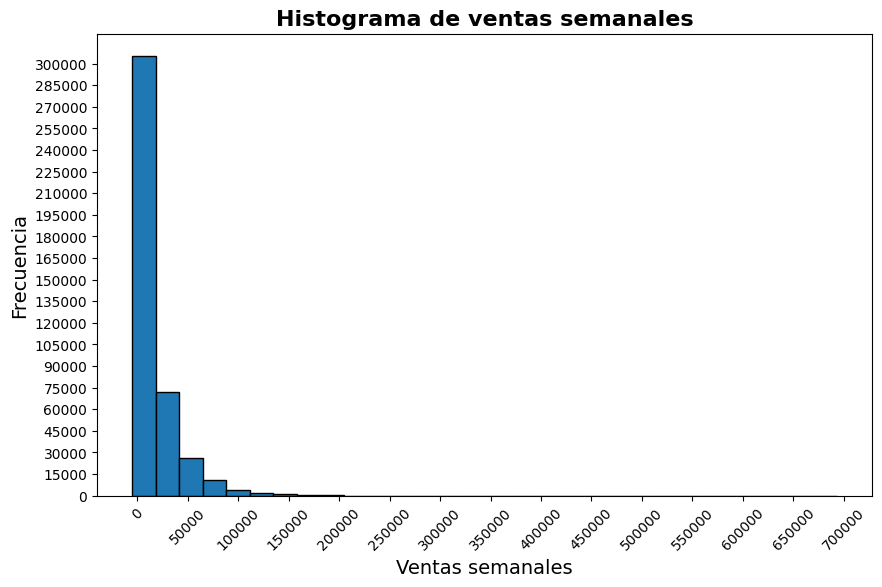

In [8]:
# Histograma de las ventas
plt.figure(figsize=(10,6))
plt.hist(data.Weekly_Sales, 30, edgecolor='black')
plt.xlabel('Ventas semanales', fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('Frecuencia', fontsize=14)

# Ajustar intervalos de ticks (eje X)
plt.xticks(np.arange(0, 700001, 50000))

# Ajustar intervalos de ticks (eje Y)
plt.yticks(np.arange(0, 300001, 15000))

plt.ticklabel_format(style='plain', axis='both')
plt.title('Histograma de ventas semanales', fontsize=16, fontweight="bold")

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


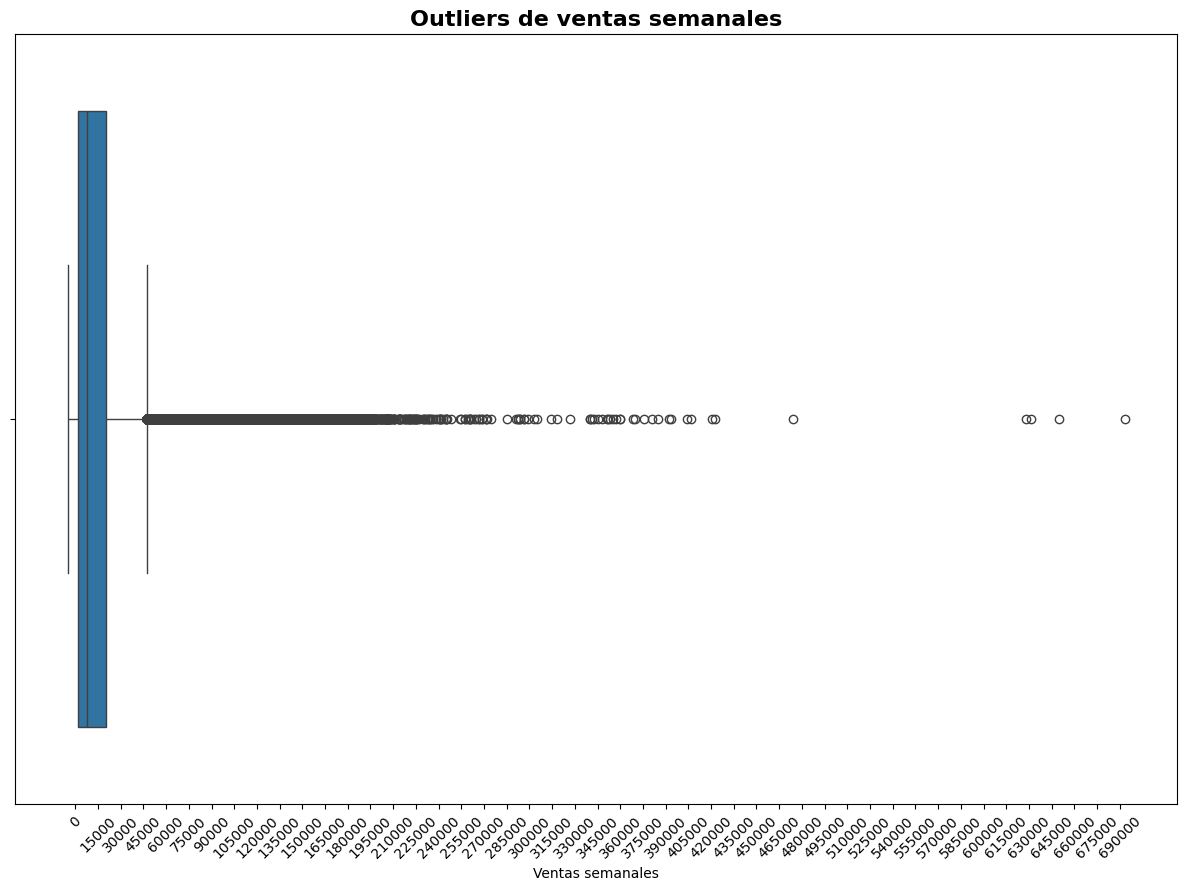

In [9]:
# outliners ventas semanales
plt.figure(figsize=(15, 10))
sb.boxplot(x=data['Weekly_Sales'])
plt.title('Outliers de ventas semanales', fontsize=16, fontweight="bold");

plt.xlabel('Ventas semanales')
plt.xticks(np.arange(0, 700000, 15000))
plt.xticks(rotation=45)

plt.show()

In [10]:
# Calcula y muestra el intervalo exacto de la mayor concentración
mean, std = np.mean(data.Weekly_Sales), np.std(data.Weekly_Sales)
lim_inf, lim_sup = mean - 2*std, mean + 2*std
print("Extremo inferior {0:.1f} - Extremo superior : {1:.1f}".format(lim_inf, lim_sup))
# Busca las ocurrencias
analizados = data.query("Weekly_Sales >= {0} & Weekly_Sales <= {1}".format(lim_inf, lim_sup))['Weekly_Sales'].count()
total = data.shape[0]
print(analizados/total*100)

Extremo inferior -29441.1 - Extremo superior : 61403.6
95.0392580117181


In [11]:
data.query('Weekly_Sales > 61403 ')

,Unnamed: 0,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Event_Type
17,17,1,2010-02-05,0,38.0,115564.35,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,3,151315,Normal
18,18,1,2010-02-05,0,93.0,64494.87,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,3,151315,Normal
21,21,1,2010-02-05,0,95.0,106690.06,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,3,151315,Normal
35,35,1,2010-02-05,0,90.0,76419.47,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,3,151315,Normal
44,44,1,2010-02-05,0,91.0,62424.14,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,3,151315,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419589,421305,45,2012-04-06,0,1.0,68621.57,49.73,3.996,13450.45,0.00,26.59,3363.54,3962.01,190.685171,8.567,2,118221,Normal
419666,421382,45,2012-04-13,0,38.0,67707.82,51.83,4.044,4736.94,6047.12,16.68,1355.11,2246.12,190.759596,8.567,2,118221,Normal
419853,421569,45,2012-05-04,0,38.0,65877.07,55.21,3.951,11984.62,0.00,47.52,6150.63,1775.54,190.922212,8.567,2,118221,Normal
419960,421676,45,2012-05-18,0,38.0,61519.24,66.30,3.848,6813.74,0.00,13.86,936.49,2941.55,190.996448,8.567,2,118221,Normal


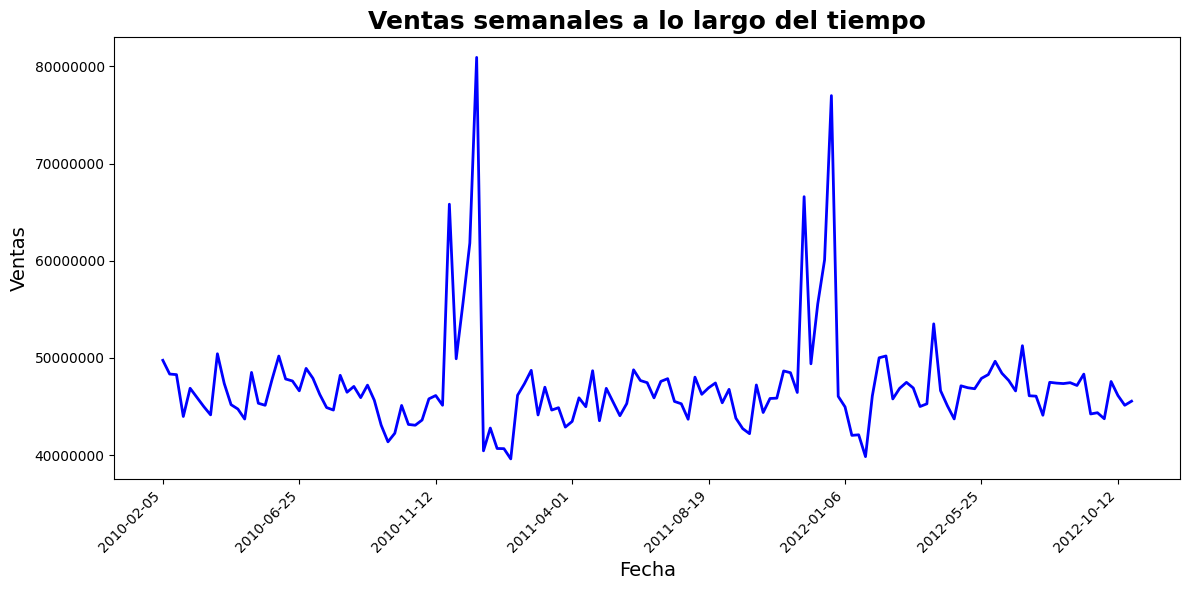

In [12]:
# Ventas en el tiempo
plt.figure(figsize=(12, 6))

# Agrupar por la columna 'Date' y sumar las ventas semanales, graficando el resultado
data.groupby('Date')['Weekly_Sales'].sum().plot(color='blue', linewidth=2)

# Etiquetas de los ejes con ajuste de fuente y tamaño
plt.xlabel('Fecha', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Ventas', fontsize=14)

# Ajuste de formato de los números en los ejes
plt.ticklabel_format(style='plain', axis='y')

plt.title("Ventas semanales a lo largo del tiempo", fontsize=18, fontweight="bold")

# Mejor ajuste de márgenes
plt.tight_layout()

plt.show()

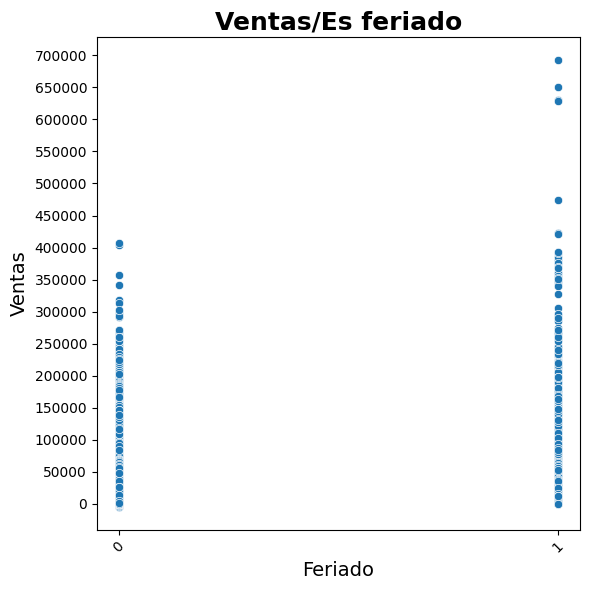

In [15]:
plt.figure(figsize=(6, 6))
sb.scatterplot(x='IsHoliday', y='Weekly_Sales', data=data)
plt.xticks(rotation=45)
plt.xlabel('Feriado', fontsize=14)
plt.ylabel('Ventas', fontsize=14)

plt.yticks(np.arange(0, 700001, 50000))
plt.xticks(np.arange(0, 2, 1))
plt.title("Ventas/Es feriado", fontsize=18, fontweight="bold")
plt.tight_layout()
plt.show()

In [16]:
len(data.query('IsHoliday == 0'))
len(data.query('IsHoliday == 1'))


29661

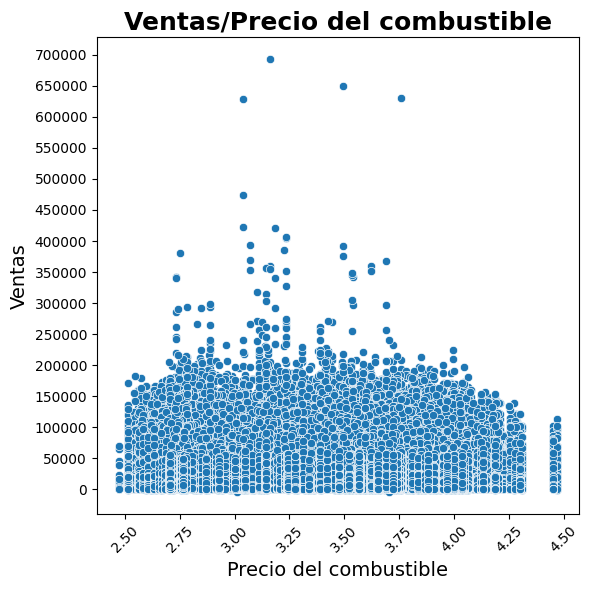

In [22]:
plt.figure(figsize=(6, 6))
sb.scatterplot(x='Fuel_Price', y='Weekly_Sales', data=data)
plt.xticks(rotation=45)
plt.xlabel('Precio del combustible', fontsize=14)
plt.ylabel('Ventas', fontsize=14)

plt.yticks(np.arange(0, 700001, 50000))
plt.title("Ventas/Precio del combustible", fontsize=18, fontweight="bold")
plt.tight_layout()
plt.show()

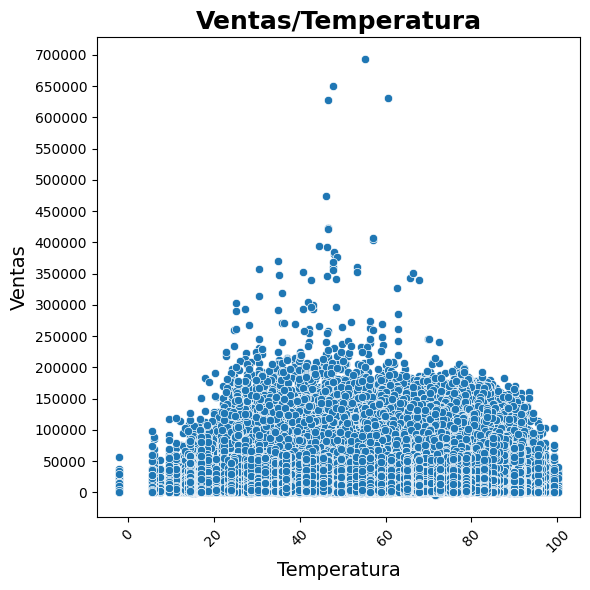

In [21]:
plt.figure(figsize=(6, 6))
sb.scatterplot(x='Temperature', y='Weekly_Sales', data=data)
plt.xticks(rotation=45)
plt.xlabel('Temperatura', fontsize=14)
plt.ylabel('Ventas', fontsize=14)

plt.yticks(np.arange(0, 700001, 50000))
plt.title("Ventas/Temperatura", fontsize=18, fontweight="bold")
plt.tight_layout()
plt.show()

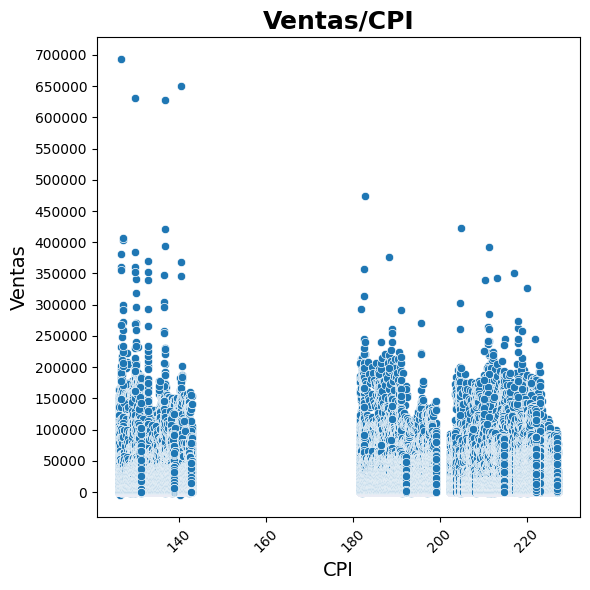

In [20]:
plt.figure(figsize=(6, 6))
sb.scatterplot(x='CPI', y='Weekly_Sales', data=data)
plt.xticks(rotation=45)
plt.xlabel('CPI', fontsize=14)
plt.ylabel('Ventas', fontsize=14)

plt.yticks(np.arange(0, 700001, 50000))
plt.title("Ventas/CPI", fontsize=18, fontweight="bold")
plt.tight_layout()
plt.show()

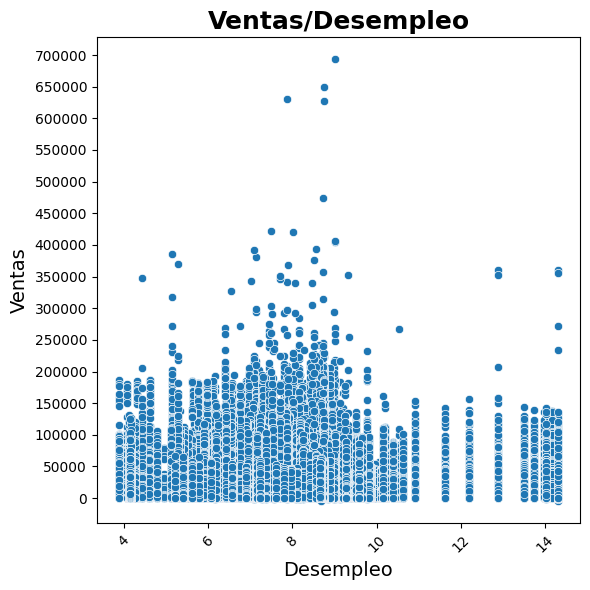

In [19]:
plt.figure(figsize=(6, 6))
sb.scatterplot(x='Unemployment', y='Weekly_Sales', data=data)
plt.xticks(rotation=45)
plt.xlabel('Desempleo', fontsize=14)
plt.ylabel('Ventas', fontsize=14)

plt.yticks(np.arange(0, 700001, 50000))
plt.title("Ventas/Desempleo", fontsize=18, fontweight="bold")
plt.tight_layout()
plt.show()

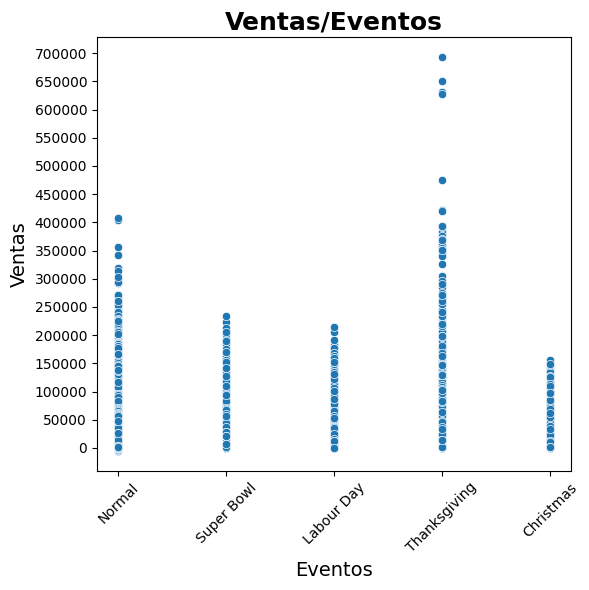

In [ ]:
plt.figure(figsize=(6, 6))
sb.scatterplot(x='Event_Type', y='Weekly_Sales', data=data)
plt.xticks(rotation=45)
plt.xlabel('Eventos', fontsize=14)
plt.ylabel('Ventas', fontsize=14)

plt.yticks(np.arange(0, 700001, 50000))
plt.title("Ventas/Eventos", fontsize=18, fontweight="bold")
plt.tight_layout()
plt.show()

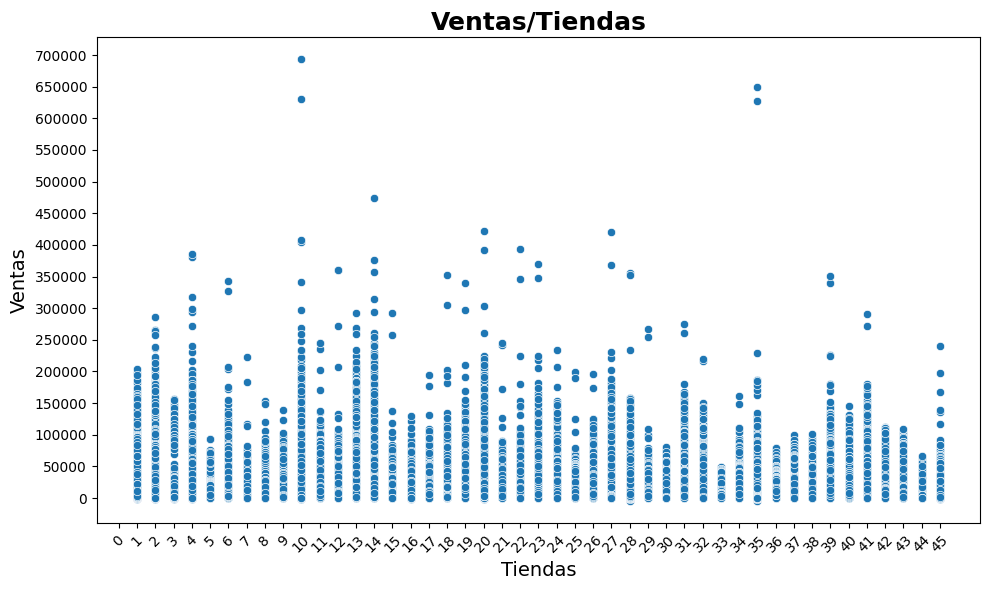

In [ ]:
plt.figure(figsize=(10, 6))
sb.scatterplot(x='Store', y='Weekly_Sales', data=data)
plt.xticks(rotation=45)
plt.xlabel('Tiendas', fontsize=14)
plt.ylabel('Ventas', fontsize=14)

plt.xticks(np.arange(0, 46, 1))
plt.yticks(np.arange(0, 700001, 50000))
plt.title("Ventas/Tiendas", fontsize=18, fontweight="bold")
plt.tight_layout()
plt.show()

# Fase 3 - Preparación de los datos

In [23]:
# Elimina las columnas con cero aporte analítico

#'Unnamed: 0', 'Date', 'Store', 'Dept', 'Temperature', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size', 'Event_Type', 'Fuel_Price'

df_final = data.drop(['Unnamed: 0', 'Date','Store', 'Event_Type'], axis=1)

df_final

,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,0,1.0,24924.50,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315
1,0,26.0,11737.12,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315
2,0,17.0,13223.76,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315
3,0,45.0,37.44,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315
4,0,28.0,1085.29,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,0,13.0,26240.14,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221
421566,0,16.0,2660.02,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221
421567,0,32.0,4131.54,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221
421568,0,83.0,717.82,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221


In [24]:
df_final.describe().T

,count,mean,std,min,25%,50%,75%,max
IsHoliday,421570.0,0.070358,0.255750,0.000,0.000000,0.00000,0.000000,1.000000
Dept,421570.0,44.260317,30.492054,1.000,18.000000,37.00000,74.000000,99.000000
Weekly_Sales,421570.0,15981.258123,22711.183519,-4988.940,2079.650000,7612.03000,20205.852500,693099.360000
Temperature,421570.0,60.090059,18.447931,-2.060,46.680000,62.09000,74.280000,100.140000
Fuel_Price,421570.0,3.361027,0.458515,2.472,2.933000,3.45200,3.738000,4.468000
MarkDown1,421570.0,2590.074819,6052.385934,0.000,0.000000,0.00000,2809.050000,88646.760000
MarkDown2,421570.0,879.974298,5084.538801,-265.760,0.000000,0.00000,2.200000,104519.540000
MarkDown3,421570.0,468.087665,5528.873453,-29.100,0.000000,0.00000,4.540000,141630.610000
MarkDown4,421570.0,1083.132268,3894.529945,0.000,0.000000,0.00000,425.290000,67474.850000
MarkDown5,421570.0,1662.772385,4207.629321,0.000,0.000000,0.00000,2168.040000,108519.280000


In [25]:
# Obtiene la matriz de correlación de las columnas numéricas
corr_matrix = df_final[df_final.describe().columns].corr()

# Extrae las correlaciones con la columna 'price' y las ordena de mayor a menor
corr_matrix["Weekly_Sales"].sort_values(ascending=False)

,Weekly_Sales
Weekly_Sales,1.000000
Size,0.243828
Type,0.182242
Dept,0.148032
MarkDown5,0.050465
MarkDown1,0.047172
MarkDown3,0.038562
MarkDown4,0.037467
MarkDown2,0.020716
IsHoliday,0.012774


In [26]:
# Recupera la versión original de los datos
original_dt_final = df_final
original_dt_final


,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,0,1.0,24924.50,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315
1,0,26.0,11737.12,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315
2,0,17.0,13223.76,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315
3,0,45.0,37.44,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315
4,0,28.0,1085.29,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,0,13.0,26240.14,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221
421566,0,16.0,2660.02,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221
421567,0,32.0,4131.54,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221
421568,0,83.0,717.82,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221


In [ ]:
df_final = original_dt_final

In [27]:
df_final.query('Weekly_Sales <= 0').index

Index([   182,    429,   2555,   3632,   4109,   4382,   4805,   5308,   5710,
         5786,
       ...
       418228, 418376, 418502, 418940, 419972, 420031, 420370, 420736, 421016,
       421131],
      dtype='int64', length=1358)

In [28]:
df_final.drop(df_final.query('Weekly_Sales <= 0').index, inplace=True)

In [ ]:
# Obtiene las columnas a codificar
categorical_features = df_final.describe(include = np.object_).columns


# Uso de OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(df_final[categorical_features])

# Convierte a DataFrame para ver el resultado
df_encoded = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())


# Revisa el contenido del dataframe codificado
df_encoded.head()


# Elimina la columna original 'Event_Type' (o las que correspondan a las variables categóricas)
df_final = df_final.drop(categorical_features, axis=1)

# Concatena el dataframe codificado con el dataframe original
df_final = pd.concat([df_final, df_encoded], axis=1)

# Revisa el resultado final
df_final




ValueError: No objects to concatenate

In [29]:

# Separa variables independientes de la dependiente
X = df_final.drop(["Weekly_Sales"], axis=1)
X.head()



,IsHoliday,Dept,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,0,1.0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
1,0,26.0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
2,0,17.0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
3,0,45.0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
4,0,28.0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315


In [30]:
y = df_final["Weekly_Sales"]
y.head()

,Weekly_Sales
0,24924.50
1,11737.12
2,13223.76
3,37.44
4,1085.29


In [31]:
# Separación en data de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=29)

# Fase 4 - Modelamiento

## Variante 1 - Uso sólo de variables numéricas

In [32]:
def interpretacion(algoritmo : str, caracteristicas : np.array, score : float):
  return f"""Modelo de regresión {algoritmo}
   {score :.2%} de la variabilidad en las ventas semanales se puede explicar utilizando las {len(caracteristicas)} características
   Características elegidas :{caracteristicas.values}."""

In [33]:
# Creación del modelo
linreg = LinearRegression()
# Entrenamiento del modelo
linreg.fit(X_train, y_train)

LinearRegression()

In [34]:

# Evaluación del modelo
print("R squared of the Linear Regression on training set: {:.2%}".format(linreg.score(X_train, y_train)))
print("R squared of the Linear Regression on test set: {:.2%}".format(linreg.score(X_test, y_test)))

R squared of the Linear Regression on training set: 8.52%
R squared of the Linear Regression on test set: 8.45%


In [35]:

# Interpretación en el negocio
print(interpretacion("Regresión lineal", X_train.columns, linreg.score(X_test, y_test)))

Modelo de regresión Regresión lineal
   8.45% de la variabilidad en las ventas semanales se puede explicar utilizando las 13 características
   Características elegidas :['IsHoliday' 'Dept' 'Temperature' 'Fuel_Price' 'MarkDown1' 'MarkDown2'
 'MarkDown3' 'MarkDown4' 'MarkDown5' 'CPI' 'Unemployment' 'Type' 'Size'].


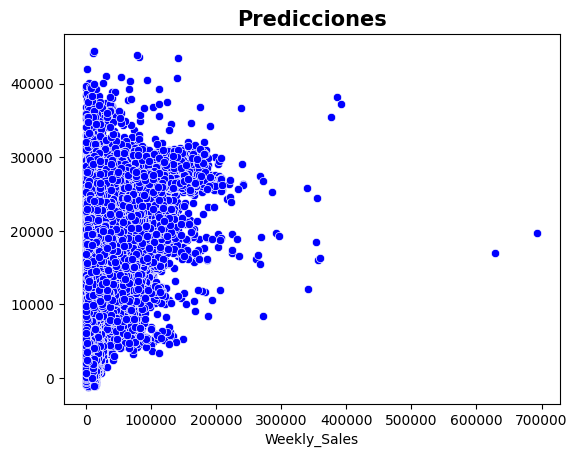

In [36]:

# Realiza predicciones
y_pred = linreg.predict(X_test)


sb.scatterplot(x=y_test , y=y_pred, color="blue")

plt.title("Predicciones", fontsize=15, fontweight="bold");

In [37]:


# Guarda resultados
history = {"LinearRegression" : [linreg, linreg.score(X_test, y_test)]}

history

{'LinearRegression': [LinearRegression(), 0.0844515364137357]}

In [38]:

# Creación del modelo
model_tree = DecisionTreeRegressor(random_state=29)
# Entrenamiento del modelo
model_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=29)

In [39]:

# Evaluación del modelo
print("R squared of the Decision Tree Regressor on training set: {:.2%}".format(model_tree.score(X_train, y_train)))
print("R squared of the Decision Tree Regressor on test set: {:.2%}".format(model_tree.score(X_test, y_test)))

R squared of the Decision Tree Regressor on training set: 100.00%
R squared of the Decision Tree Regressor on test set: 91.09%


In [40]:
# Interpretación en el negocio
print(interpretacion("Árbol de decisión", X_train.columns, model_tree.score(X_test, y_test)))

Modelo de regresión Árbol de decisión
   91.09% de la variabilidad en las ventas semanales se puede explicar utilizando las 13 características
   Características elegidas :['IsHoliday' 'Dept' 'Temperature' 'Fuel_Price' 'MarkDown1' 'MarkDown2'
 'MarkDown3' 'MarkDown4' 'MarkDown5' 'CPI' 'Unemployment' 'Type' 'Size'].


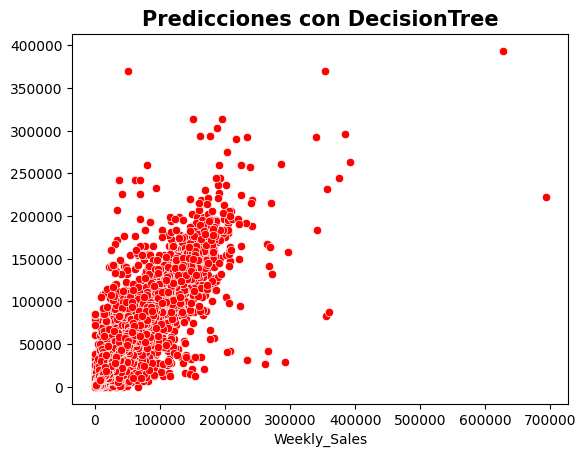

In [41]:

# Realiza predicciones
y_pred_tree = model_tree.predict(X_test)
sb.scatterplot(x=y_test , y=y_pred_tree, color="red")
plt.title("Predicciones con DecisionTree", fontsize=15, fontweight="bold");

In [42]:
# Guarda resultados
history["DecisionTreeRegressor"] = [model_tree, model_tree.score(X_test, y_test)]
history

{'LinearRegression': [LinearRegression(), 0.0844515364137357],
 'DecisionTreeRegressor': [DecisionTreeRegressor(random_state=29),
  0.9108659066242497]}

In [43]:
# Creación del modelo
model_rf = RandomForestRegressor(n_estimators=100, random_state=29)
# Entrenamiento del modelo
model_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=29)

In [44]:
# Evaluación
print("R squared of the Random Forest Regressor on training set: {:.2%}".format(model_rf.score(X_train, y_train)))
print("R squared of the Random Forest Regressor on test set: {:.2%}".format(model_rf.score(X_test, y_test)))


R squared of the Random Forest Regressor on training set: 99.27%
R squared of the Random Forest Regressor on test set: 94.48%


In [45]:

# Interpretación en el negocio
print(interpretacion("RandomForest", X_train.columns, model_rf.score(X_test, y_test)))

Modelo de regresión RandomForest
   94.48% de la variabilidad en las ventas semanales se puede explicar utilizando las 13 características
   Características elegidas :['IsHoliday' 'Dept' 'Temperature' 'Fuel_Price' 'MarkDown1' 'MarkDown2'
 'MarkDown3' 'MarkDown4' 'MarkDown5' 'CPI' 'Unemployment' 'Type' 'Size'].


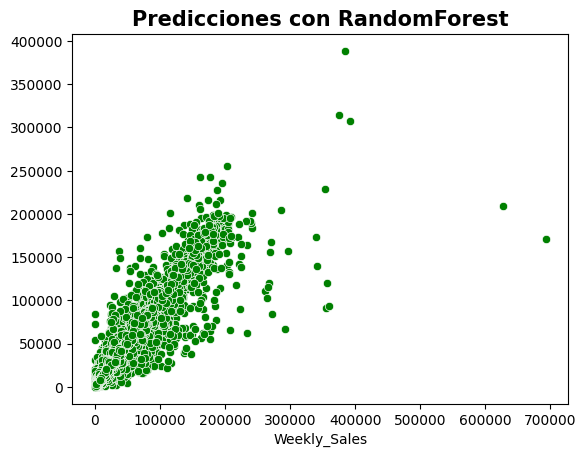

In [46]:

y_pred_rf = model_rf.predict(X_test)
sb.scatterplot(x=y_test , y=y_pred_rf, color="green")
plt.title("Predicciones con RandomForest", fontsize=15, fontweight="bold");

In [47]:

# Guarda resultados
history["RandomForestRegressor"] = [model_rf, model_rf.score(X_test, y_test)]
history

{'LinearRegression': [LinearRegression(), 0.0844515364137357],
 'DecisionTreeRegressor': [DecisionTreeRegressor(random_state=29),
  0.9108659066242497],
 'RandomForestRegressor': [RandomForestRegressor(random_state=29),
  0.9447785461967914]}

## Variante 2 - Uso de variables numéricas y categórica


In [ ]:
# Escriba su código acá

# Fase 5 - Evaluación

## Variante 1 - Uso sólo de variables numéricas

In [48]:
def mae_interpretacion(modelo : str, value : float):
  print(f"El moodelo '{modelo}' pudo predecir el precio de cada diamante en el conjunto de prueba con un error de ± $ {value:.2f} del precio real.")

def msle_interpretacion(modelo : str, value : float):
  print(f"El modelo '{modelo}' pudo predecir el precio de cada diamante en el conjunto de prueba con un error de ± {value: .2%} del precio real.")

In [49]:

# Evaluando el Modelo de Regresión Lineal
#
d = {"real": y_test, "prediccion": y_pred}
df_lr = pd.DataFrame(data=d)
df_lr["delta"] = df_lr["prediccion"]-df_lr["real"]
df_lr

,real,prediccion,delta
118026,12860.02,24472.278958,11612.258958
168165,26646.26,10713.272568,-15932.987432
38077,2119.00,24558.316251,22439.316251
287714,21558.06,14882.676946,-6675.383054
162891,46.49,13514.102757,13467.612757
...,...,...,...
19879,9235.42,19599.018849,10363.598849
73361,30565.84,13059.927208,-17505.912792
421489,10116.17,9924.210048,-191.959952
197923,1316.50,15558.621433,14242.121433


In [50]:

print("Mean Absolute Error of the Linear Regression on test set is {:.2f}".format(mean_absolute_error(y_test, y_pred)))

Mean Absolute Error of the Linear Regression on test set is 14596.68


In [51]:

mae_interpretacion("Regresión lineal", mean_absolute_error(y_test, y_pred))

El moodelo 'Regresión lineal' pudo predecir el precio de cada diamante en el conjunto de prueba con un error de ± $ 14596.68 del precio real.


In [52]:
print("Mean Squared Log Error of the Linear Regression on test set is {:.2%}".format(mean_squared_log_error(y_test,y_pred)))


ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.

In [53]:

# Evaluando el Modelo de Árbol de Decisión de regresión
#
d = {"real": y_test, "prediccion": y_pred_tree}
df_dt = pd.DataFrame(data=d)
df_dt["delta"] = df_dt["prediccion"]-df_dt["real"]
df_dt


,real,prediccion,delta
118026,12860.02,10011.69,-2848.33
168165,26646.26,30505.09,3858.83
38077,2119.00,2886.00,767.00
287714,21558.06,21696.00,137.94
162891,46.49,121.77,75.28
...,...,...,...
19879,9235.42,8605.48,-629.94
73361,30565.84,27561.70,-3004.14
421489,10116.17,9288.22,-827.95
197923,1316.50,2300.00,983.50


In [54]:
print("Mean Absolute Error of the Decision Tree Regressor on test set is {:.2f}".format(mean_absolute_error(y_test,y_pred_tree)))


Mean Absolute Error of the Decision Tree Regressor on test set is 2426.72


In [55]:


mae_interpretacion("Árbol de decisión", mean_absolute_error(y_test, y_pred_tree))

El moodelo 'Árbol de decisión' pudo predecir el precio de cada diamante en el conjunto de prueba con un error de ± $ 2426.72 del precio real.


In [56]:
print("Mean Squared Log Error of the Decision Tree Regressor on test set is {:.2%}".format(mean_squared_log_error(y_test,y_pred_tree)))


Mean Squared Log Error of the Decision Tree Regressor on test set is 30.15%


In [57]:

msle_interpretacion("Árbol de decisión", mean_squared_log_error(y_test,y_pred_tree))

El modelo 'Árbol de decisión' pudo predecir el precio de cada diamante en el conjunto de prueba con un error de ±  30.15% del precio real.


In [58]:

# # Evaluando el Modelo de Bosque Aleatorio de árboles de decisión
#
d = {"real": y_test, "prediccion": y_pred_rf}
df_rf = pd.DataFrame(data=d)
df_rf["delta"] = df_rf["prediccion"]-df_rf["real"]
df_rf


,real,prediccion,delta
118026,12860.02,12065.5945,-794.4255
168165,26646.26,26918.6367,272.3767
38077,2119.00,2494.4309,375.4309
287714,21558.06,21043.5610,-514.4990
162891,46.49,113.7832,67.2932
...,...,...,...
19879,9235.42,8199.1829,-1036.2371
73361,30565.84,28538.6380,-2027.2020
421489,10116.17,10717.6876,601.5176
197923,1316.50,2985.9663,1669.4663


In [59]:
print("Mean Absolute Error of the Random Forest Regressor on test set is {:.2f}".format(mean_absolute_error(y_test,y_pred_rf)))


Mean Absolute Error of the Random Forest Regressor on test set is 1904.63


In [60]:
print("Mean Squared Log Error of the Random Forest Regressor on test set is {:.2%}".format(mean_squared_log_error(y_test,y_pred_rf)))


Mean Squared Log Error of the Random Forest Regressor on test set is 25.98%


In [61]:
mae_interpretacion("RandomForest", mean_absolute_error(y_test, y_pred_rf))
msle_interpretacion("RandomForest", mean_squared_log_error(y_test,y_pred_rf))

El moodelo 'RandomForest' pudo predecir el precio de cada diamante en el conjunto de prueba con un error de ± $ 1904.63 del precio real.
El modelo 'RandomForest' pudo predecir el precio de cada diamante en el conjunto de prueba con un error de ±  25.98% del precio real.


In [62]:
def get_bestModel( history : dict):
  # Inicializar una variable para almacenar el mayor valor
  mayor_valor = float('-inf')

  # Recorrer el diccionario
  for modelo, data in history.items():
    # Comparar el segundo elemento de la lista (data[1] almacena el score) con el mayor encontrado hasta ahora
    if data[1] > mayor_valor:
        mayor_valor = data[1]
        best_model = data[0]

  return best_model, mayor_valor, modelo


best_model, best_score, name_model = get_bestModel(history)
print("El mejor rendimiento es: {0:.2%} y le corresponde a {1}".format(best_score, name_model))

El mejor rendimiento es: 94.48% y le corresponde a RandomForestRegressor


## Variante 2 - Uso de variables numéricas y categórica

In [ ]:
# Escriba su código acá

# Fase 6 - Deployment

## Variante 1 - Uso sólo de variables numéricas

In [ ]:
# Escriba su código acá

## Variante 2 - Uso de variables numéricas y categórica

In [ ]:
# Escriba su código acá

# Pregunta final

¿Qué modelo recomendaría utilizar para cumplir con el objetivo propuesto al inicio? Deberá justificar su respuesta